# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [ ]:
import pandas as pd
import numpy as np

from pathlib import Path

## Perguntas - Obesity among adults by country, 1975-2016

In [551]:
print(Path.cwd())
pasta_datasets = Path(Path.cwd() / 'Datasets\\analise-de-obesidade-e-pib-per-capita\\')

print(pasta_datasets)

d:\Cursos\Python\Python - Asimov Academy\Projetos\Analisando Dados com Pandas & SQL
d:\Cursos\Python\Python - Asimov Academy\Projetos\Analisando Dados com Pandas & SQL\Datasets\analise-de-obesidade-e-pib-per-capita


In [552]:
df_obesity = pd.read_csv(pasta_datasets / 'obesity_cleaned.csv')
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


## - Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [553]:
df_obesity.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [554]:
del df_obesity['Unnamed: 0']

In [555]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  int64 
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: int64(1), object(3)
memory usage: 767.9+ KB


In [556]:
df_obesity['Obesity (%)'].value_counts()

Obesity (%)
No data             504
0.4 [0.1-1.0]        55
0.6 [0.2-1.3]        47
0.3 [0.1-0.7]        46
0.3 [0.1-0.8]        46
                   ... 
18.5 [14.1-23.7]      1
11.2 [8.8-14.0]       1
19.0 [14.5-24.1]      1
11.9 [9.4-14.7]       1
4.7 [2.5-8.0]         1
Name: count, Length: 16375, dtype: int64

In [557]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])   

In [558]:
df_obesity['Obesity']

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [559]:
df_obesity['Obesity'].value_counts()

Obesity
No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
56.8      1
62.4      1
60.0      1
62.6      1
60.3      1
Name: count, Length: 602, dtype: int64

In [560]:
df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan

In [561]:
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()

In [562]:
# df_obesity[['Obesity', '(%)']] = df_obesity['Obesity (%)'].str.split(' ', expand=True, n=1)

In [563]:
df_obesity['Obesity'].value_counts()

Obesity
0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
61.9      1
56.8      1
62.1      1
42.7      1
46.5      1
Name: count, Length: 601, dtype: int64

In [564]:
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))

In [565]:
df_obesity.set_index('Year', inplace=True)

In [566]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [567]:
# df_obesity['Obesity'] = pd.to_numeric(df_obesity['Obesity'], 'coerce')

In [568]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24570 entries, 1975 to 2016
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24570 non-null  object 
 1   Obesity (%)  24570 non-null  object 
 2   Sex          24570 non-null  object 
 3   Obesity      24066 non-null  float64
dtypes: float64(1), object(3)
memory usage: 959.8+ KB


## - Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [569]:
df_obesity[df_obesity.index == 2015].groupby(['Year','Sex']).agg({'Obesity': 'mean'})

Obesity
Year Sex                  
2015 Both sexes  19.508377
     Female      22.899476
     Male        15.980628

In [570]:
df_obesity[df_obesity.index == 2015].groupby(['Year','Sex'])['Obesity'].mean()

Year  Sex       
2015  Both sexes    19.508377
      Female        22.899476
      Male          15.980628
Name: Obesity, dtype: float64

## - Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [571]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

In [572]:
df_obesity_start.set_index('Country', inplace=True)

In [573]:
df_obesity_end.set_index('Country', inplace=True)

In [574]:
df_obesity_end

,Obesity (%),Sex,Obesity
Country,,,
Afghanistan,5.5 [3.4-8.1],Both sexes,5.5
Afghanistan,3.2 [1.3-6.4],Male,3.2
Afghanistan,7.6 [4.3-12.4],Female,7.6
Albania,21.7 [17.0-26.7],Both sexes,21.7
Albania,21.6 [14.8-29.0],Male,21.6
...,...,...,...
Zambia,3.6 [1.7-6.5],Male,3.6
Zambia,12.4 [8.5-17.1],Female,12.4
Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [575]:
df_obesity_start

,Obesity (%),Sex,Obesity
Country,,,
Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
Afghanistan,0.2 [0.0-0.6],Male,0.2
Afghanistan,0.8 [0.2-2.0],Female,0.8
Albania,6.5 [3.6-10.5],Both sexes,6.5
Albania,4.4 [1.7-9.2],Male,4.4
...,...,...,...
Zambia,0.5 [0.1-1.4],Male,0.5
Zambia,2.5 [1.0-5.1],Female,2.5
Zimbabwe,3.7 [1.7-6.5],Both sexes,3.7


In [576]:
df_obesity_ev = df_obesity_end[df_obesity_end['Sex'] == 'Both sexes']['Obesity'] - df_obesity_start[df_obesity_start['Sex'] == 'Both sexes']['Obesity']

In [577]:
df_obesity_ev

Country
Afghanistan                            5.0
Albania                               15.2
Algeria                               20.5
Andorra                               12.7
Angola                                 7.4
                                      ... 
Venezuela (Bolivarian Republic of)    16.0
Viet Nam                               2.0
Yemen                                 14.3
Zambia                                 6.6
Zimbabwe                              11.8
Name: Obesity, Length: 195, dtype: float64

In [578]:
df_obesity_ev.sort_values(ascending=False).dropna().head(5)

Country
Tuvalu          33.7
Niue            31.1
Kiribati        30.1
Tonga           28.3
Cook Islands    27.9
Name: Obesity, dtype: float64

In [579]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [580]:
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [581]:
df_obesity_ev.sort_values().dropna().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

## - Quais os países com maiores e menores níveis percentuais de obesidade em 2015?

In [582]:
df_obesity_2015 = df_obesity[df_obesity.index == 2015]
df_obesity_2015[df_obesity_2015['Obesity'] == df_obesity_2015['Obesity'].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


In [583]:
df_obesity_2015 = df_obesity[df_obesity.index == 2015]
df_obesity_2015[df_obesity_2015['Obesity'] == df_obesity_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


## - Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [584]:
df_brazil = df_obesity[df_obesity['Country'] == 'Brazil']
df_brazil

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Brazil,5.2 [3.3-7.9],Both sexes,5.2
1975,Brazil,3.0 [1.4-5.7],Male,3.0
1975,Brazil,7.3 [4.0-12.0],Female,7.3
1976,Brazil,5.5 [3.5-8.1],Both sexes,5.5
1976,Brazil,3.2 [1.5-5.8],Male,3.2
...,...,...,...,...
2015,Brazil,18.0 [13.9-22.6],Male,18.0
2015,Brazil,24.9 [20.3-29.8],Female,24.9
2016,Brazil,22.1 [18.7-25.7],Both sexes,22.1


In [585]:
df_brazil[df_brazil['Sex'] == 'Female']['Obesity'] - df_brazil[df_brazil['Sex'] == 'Male']['Obesity']

Year
1975    4.3
1976    4.4
1977    4.6
1978    4.7
1979    4.9
1980    4.9
1981    5.1
1982    5.2
1983    5.4
1984    5.5
1985    5.6
1986    5.7
1987    5.8
1988    5.9
1989    6.0
1990    6.1
1991    6.1
1992    6.3
1993    6.3
1994    6.4
1995    6.4
1996    6.5
1997    6.6
1998    6.7
1999    6.8
2000    6.8
2001    6.8
2002    6.8
2003    6.9
2004    6.9
2005    6.9
2006    6.9
2007    7.0
2008    6.9
2009    7.0
2010    7.0
2011    6.9
2012    6.9
2013    6.9
2014    6.9
2015    6.9
2016    6.9
Name: Obesity, dtype: float64

<Axes: xlabel='Year'>

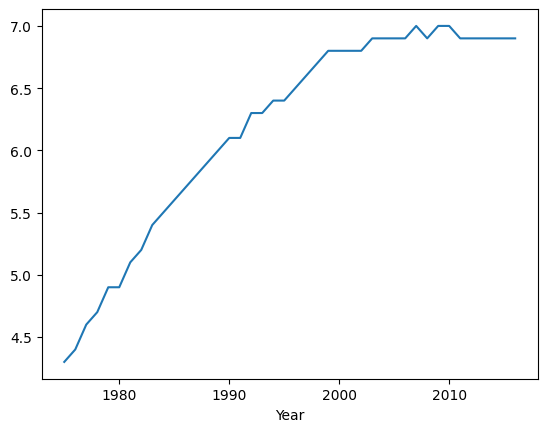

In [586]:
(df_brazil[df_brazil['Sex'] == 'Female']['Obesity'] - df_brazil[df_brazil['Sex'] == 'Male']['Obesity']).plot()

## - Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [587]:
df_both = df_obesity[df_obesity['Sex'] == 'Both sexes']
df_both

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1977,Afghanistan,0.6 [0.2-1.2],Both sexes,0.6
1978,Afghanistan,0.6 [0.2-1.3],Both sexes,0.6
1979,Afghanistan,0.6 [0.3-1.3],Both sexes,0.6
...,...,...,...,...
2012,Zimbabwe,14.3 [11.4-17.6],Both sexes,14.3
2013,Zimbabwe,14.6 [11.5-18.0],Both sexes,14.6
2014,Zimbabwe,14.9 [11.7-18.4],Both sexes,14.9


<Axes: xlabel='Year'>

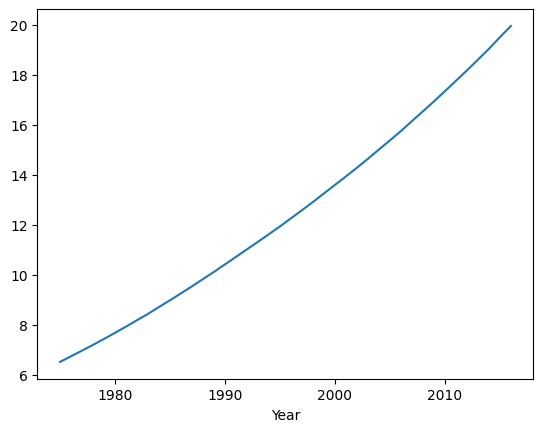

In [588]:
df_both.groupby('Year')['Obesity'].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [589]:
print(Path.cwd())
pasta_datasets = Path(Path.cwd() / 'Datasets\\analise-de-obesidade-e-pib-per-capita\\')

print(pasta_datasets)

d:\Cursos\Python\Python - Asimov Academy\Projetos\Analisando Dados com Pandas & SQL
d:\Cursos\Python\Python - Asimov Academy\Projetos\Analisando Dados com Pandas & SQL\Datasets\analise-de-obesidade-e-pib-per-capita


In [590]:
df_gdp = pd.read_csv(pasta_datasets / 'gdp.csv', decimal='.')
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


## - Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [591]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [592]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: int(x.split('/')[-1]))

In [593]:
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

### Obs.: Tanto o cabeçalho quanto os dados da coluna df_gdp[' GDP_pp '] possuem espaços no início e no final.

In [594]:
df_gdp[' GDP_pp ']

0        613.99 
1        624.04 
2        634.25 
3        647.28 
4        662.40 
          ...   
4414     782.09 
4415     781.50 
4416     719.96 
4417     520.17 
4418     526.33 
Name:  GDP_pp , Length: 4419, dtype: object

In [595]:
df_gdp[' GDP_pp '].iloc[0]

' 613.99 '

In [596]:
df_gdp['gdp_pp'] = df_gdp[' GDP_pp '].apply(lambda x: float(x.split()[0].replace(',', '')))

In [597]:
del df_gdp[' GDP_pp ']

In [598]:
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


## - Você conseguiria informar o primeiro valor registrado de cada país?

In [599]:
df_gdp.groupby('Country')['Year'].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [600]:
df_idx_anos_iniciais = df_gdp.groupby('Country')['Year'].idxmin()
df_idx_anos_iniciais

Country
Afghanistan       0
Albania          23
Algeria          46
Andorra          69
Angola           92
               ... 
Venezuela      4304
Vietnam        4327
Yemen, Rep.    4350
Zambia         4373
Zimbabwe       4396
Name: Year, Length: 193, dtype: int64

In [601]:
df_prim_registro = df_gdp.loc[df_idx_anos_iniciais][['Country', 'Year', 'gdp_pp']]
df_prim_registro

,Country,Year,gdp_pp
0,Afghanistan,1901,613.99
23,Albania,1901,1062.01
46,Algeria,1901,1807.76
69,Andorra,1901,3352.50
92,Angola,1901,525.76
...,...,...,...
4304,Venezuela,1901,766.21
4327,Vietnam,1901,572.96
4350,"Yemen, Rep.",1901,729.39
4373,Zambia,1901,532.38


In [602]:
df_prim_registro['Year'].value_counts()

Year
1901    192
1991      1
Name: count, dtype: int64

In [603]:
df_prim_registro[df_prim_registro['Year'] == 1991]

,Country,Year,gdp_pp
2024,Kosovo,1991,5453.79


## - Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [604]:
df_sec_pass = df_gdp[df_gdp['Year'] < 2000]
df_sec_pass

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4411,Zimbabwe,Sub-Saharan Africa,1976,762.17
4412,Zimbabwe,Sub-Saharan Africa,1981,790.30
4413,Zimbabwe,Sub-Saharan Africa,1986,742.30
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09


In [605]:
df_sec_pass.groupby(['Region']).mean('gdp_pp')

,Year,gdp_pp
Region,,
Asia,1948.500000,3001.478630
Australia and Oceania,1948.500000,4041.449000
Central America and the Caribbean,1948.500000,3541.117132
Europe,1948.597614,7995.989024
"Middle East, North Africa, and Greater Arabia",1948.500000,6432.389435
North America,1948.500000,11384.292500
South America,1948.500000,3815.537875
Sub-Saharan Africa,1948.500000,1348.643826


In [606]:
# df_gdp_start = df_gdp[df_gdp['Year'] == 1901]
# df_gdp_start

In [607]:
df_gdp_start = df_sec_pass[df_sec_pass['Year'] == df_sec_pass['Year'].min()]
df_gdp_start

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
23,Albania,Europe,1901,1062.01
46,Algeria,"Middle East, North Africa, and Greater Arabia",1901,1807.76
69,Andorra,Europe,1901,3352.50
92,Angola,Sub-Saharan Africa,1901,525.76
...,...,...,...,...
4304,Venezuela,South America,1901,766.21
4327,Vietnam,Asia,1901,572.96
4350,"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1901,729.39
4373,Zambia,Sub-Saharan Africa,1901,532.38


In [608]:
# df_gdp_start = df_gdp[df_gdp['Year'] == 1996]
# df_gdp_start

In [609]:
df_gdp_end = df_sec_pass[df_sec_pass['Year'] == df_sec_pass['Year'].max()]
df_gdp_end

,Country,Region,Year,gdp_pp
19,Afghanistan,"Middle East, North Africa, and Greater Arabia",1996,617.91
42,Albania,Europe,1996,3569.59
65,Algeria,"Middle East, North Africa, and Greater Arabia",1996,4824.21
88,Andorra,Europe,1996,25839.07
111,Angola,Sub-Saharan Africa,1996,2157.35
...,...,...,...,...
4323,Venezuela,South America,1996,9725.53
4346,Vietnam,Asia,1996,1300.38
4369,"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1996,2022.93
4392,Zambia,Sub-Saharan Africa,1996,1060.55


In [610]:
df_gdp_start.groupby('Region').agg({'gdp_pp': 'mean'})

,gdp_pp
Region,
Asia,900.756296
Australia and Oceania,1492.222000
Central America and the Caribbean,1460.596842
Europe,2583.788478
"Middle East, North Africa, and Greater Arabia",1164.350000
North America,3676.015000
South America,1638.665833
Sub-Saharan Africa,650.119783


In [611]:
df_gdp_start.groupby('Region')['gdp_pp'].mean()

Region
Asia                                              900.756296
Australia and Oceania                            1492.222000
Central America and the Caribbean                1460.596842
Europe                                           2583.788478
Middle East, North Africa, and Greater Arabia    1164.350000
North America                                    3676.015000
South America                                    1638.665833
Sub-Saharan Africa                                650.119783
Name: gdp_pp, dtype: float64

In [612]:
df_gdp_end.groupby('Region').agg({'gdp_pp': 'mean'})

,gdp_pp
Region,
Asia,7311.992963
Australia and Oceania,7402.546000
Central America and the Caribbean,7396.853684
Europe,17932.684894
"Middle East, North Africa, and Greater Arabia",11145.343913
North America,25355.687500
South America,6753.330833
Sub-Saharan Africa,2266.537174


In [613]:
df_gdp_end.groupby('Region')['gdp_pp'].mean()

Region
Asia                                              7311.992963
Australia and Oceania                             7402.546000
Central America and the Caribbean                 7396.853684
Europe                                           17932.684894
Middle East, North Africa, and Greater Arabia    11145.343913
North America                                    25355.687500
South America                                     6753.330833
Sub-Saharan Africa                                2266.537174
Name: gdp_pp, dtype: float64

In [614]:
((df_gdp_end.groupby('Region')['gdp_pp'].mean() / df_gdp_start.groupby('Region')['gdp_pp'].mean() - 1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: gdp_pp, dtype: float64

## - Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [615]:
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [616]:
arr_year = np.arange(df_gdp['Year'].min(), df_gdp['Year'].max())
arr_year

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [617]:
df_all_years = pd.DataFrame(arr_year, columns=['Year'])
df_all_years

,Year
0,1901
1,1902
2,1903
3,1904
4,1905
...,...
105,2006
106,2007
107,2008
108,2009


In [618]:
df_all_years.index = df_all_years['Year']
df_all_years

,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008


In [619]:
df_years_off = ~df_all_years['Year'].isin(df_gdp['Year'])
df_years_off.head(10)

Year
1901    False
1902     True
1903     True
1904     True
1905     True
1906    False
1907     True
1908     True
1909     True
1910     True
Name: Year, dtype: bool

In [620]:
df_years_off = df_all_years.loc[df_years_off].index
df_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [621]:
df_gdp = df_gdp.sort_values(['Country', 'Year'])
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [622]:
df_gdp['delta_gdp'] = df_gdp['gdp_pp'] - df_gdp['gdp_pp'].shift(1)
df_gdp['delta_year'] = df_gdp['Year'] - df_gdp['Year'].shift(1)
df_gdp['gdp_year'] = (df_gdp['delta_gdp'] / df_gdp['delta_year']).shift(-1)
df_gdp['next_year'] = df_gdp['Year'].shift(-1)
del df_gdp['delta_gdp'], df_gdp['delta_year']
df_gdp.head(5)

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [623]:
df_new_data = pd.DataFrame()

In [624]:
for idx, row in df_gdp.iterrows():
    if row['Year'] == 2011:
        continue

    years_to_add = df_years_off[(df_years_off < row['next_year']) & (df_years_off > row['Year'])]

    for new_year in years_to_add:
        add_row = row.copy()
        add_row['gdp_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['gdp_pp']
        add_row['Year'] = new_year
        add_row['kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [625]:
df_new_data

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [626]:
df_gdp = pd.concat([df_gdp, df_new_data])

In [627]:
df_gdp.sort_values(['Country', 'Year'], inplace=True)
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,estimated


In [628]:
df_gdp.index = df_gdp['Year']
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [629]:
df_gdp['kind'].fillna('real', inplace=True)
df_gdp

C:\Users\Robson\AppData\Local\Temp\ipykernel_25984\4237778771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gdp['kind'].fillna('real', inplace=True)


,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [630]:
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='gdp_pp'>

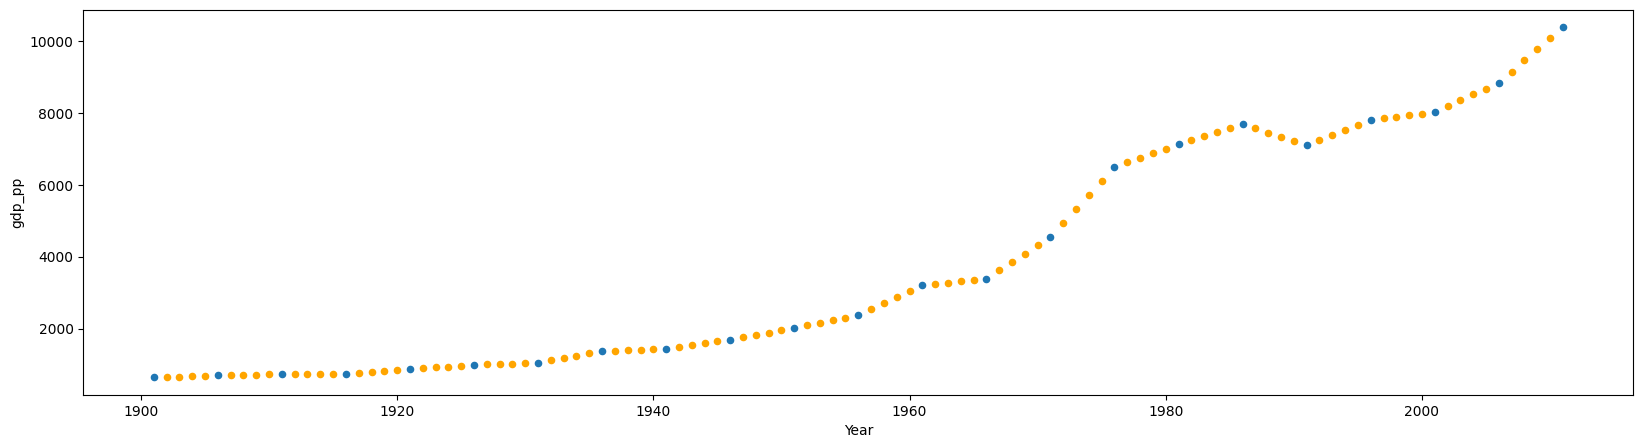

In [631]:
fig, ax = plt.subplots(figsize=(20,5))

country = 'Brazil'
df_gdp[(df_gdp['kind'] == 'real') & (df_gdp['Country'] == country)].plot(kind='scatter', y='gdp_pp', x='Year', ax=ax)
df_gdp[(df_gdp['kind'] == 'estimated') & (df_gdp['Country'] == country)].plot(kind='scatter', y='gdp_pp', x='Year', ax=ax, color='orange')

## DESAFIOS
## - Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [632]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [633]:
df_obesity

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


In [634]:
df_gdp['Year'] = df_gdp['Year'].astype(int)
df_gdp['gdp_pp'] = df_gdp['gdp_pp'].astype(float)

In [635]:
import plotly.express as px

In [637]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [643]:
dict_iso_alpha = df.set_index('country').to_dict()['iso_alpha']
dict_iso_alpha

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Angola': 'AGO',
 'Argentina': 'ARG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo, Dem. Rep.': 'COD',
 'Congo, Rep.': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Czech Republic': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Eritrea': 'ERI',
 'Ethiopia': 'ETH',
 'Finland': 'FIN',
 'France': 'FRA',
 'Gabon': 'GAB',
 'Gambia': 'GMB',
 'Germany': 'DEU',


In [650]:
dict_num = {j: i for i, j in enumerate(df_gdp['Country'].unique())}
dict_num

{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burundi': 27,
 'Cambodia': 28,
 'Cameroon': 29,
 'Canada': 30,
 'Cape Verde': 31,
 'Chad': 32,
 'Chile': 33,
 'China': 34,
 'Colombia': 35,
 'Comoros': 36,
 'Congo, Rep.': 37,
 'Costa Rica': 38,
 "Cote d'Ivoire": 39,
 'Croatia': 40,
 'Cuba': 41,
 'Cyprus': 42,
 'Czech Rep.': 43,
 'Denmark': 44,
 'Djibouti': 45,
 'Dominica': 46,
 'Ecuador': 47,
 'Egypt': 48,
 'El Salvador': 49,
 'Equatorial Guinea': 50,
 'Eritrea': 51,
 'Estonia': 52,
 'Ethiopia': 53,
 'Fiji': 54,
 'Finland': 55,
 'France': 56,
 'Gabon': 57,
 'Gambia': 58,
 'Geor

In [652]:
df_gdp['iso_alpha'] = df_gdp['Country'].map(dict_iso_alpha)
df_gdp['iso_num'] = df_gdp['Country'].map(dict_num)
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num
Year,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0
...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192


In [654]:
fig = px.choropleth(df_gdp[df_gdp['kind'] == 'real'].reset_index(drop=True), locations='iso_alpha', color='gdp_pp', hover_name='Country', animation_frame='Year')

fig.update_layout(height=600)
fig.show()

## - Há uma relação entre níveis de obesidade e gdp per capita?

In [657]:
df_obesity['country-year'] = df_obesity['Country'] + '-' + df_obesity.reset_index()['Year'].apply(lambda x: str(int(x))).values

In [658]:
df_obesity

,Country,Obesity (%),Sex,Obesity,country-year
Year,,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5,Afghanistan-1975
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2,Afghanistan-1975
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8,Afghanistan-1975
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5,Afghanistan-1976
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2,Afghanistan-1976
...,...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5,Zimbabwe-2015
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8,Zimbabwe-2015
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5,Zimbabwe-2016


In [660]:
dict_obesity_year = df_obesity.set_index('country-year').to_dict()['Obesity']
dict_obesity_year

{'Afghanistan-1975': 0.8,
 'Afghanistan-1976': 0.8,
 'Afghanistan-1977': 0.9,
 'Afghanistan-1978': 0.9,
 'Afghanistan-1979': 1.0,
 'Afghanistan-1980': 1.1,
 'Afghanistan-1981': 1.1,
 'Afghanistan-1982': 1.2,
 'Afghanistan-1983': 1.3,
 'Afghanistan-1984': 1.4,
 'Afghanistan-1985': 1.5,
 'Afghanistan-1986': 1.5,
 'Afghanistan-1987': 1.6,
 'Afghanistan-1988': 1.7,
 'Afghanistan-1989': 1.8,
 'Afghanistan-1990': 1.9,
 'Afghanistan-1991': 2.1,
 'Afghanistan-1992': 2.2,
 'Afghanistan-1993': 2.3,
 'Afghanistan-1994': 2.4,
 'Afghanistan-1995': 2.6,
 'Afghanistan-1996': 2.7,
 'Afghanistan-1997': 2.9,
 'Afghanistan-1998': 3.0,
 'Afghanistan-1999': 3.2,
 'Afghanistan-2000': 3.4,
 'Afghanistan-2001': 3.6,
 'Afghanistan-2002': 3.8,
 'Afghanistan-2003': 4.0,
 'Afghanistan-2004': 4.2,
 'Afghanistan-2005': 4.4,
 'Afghanistan-2006': 4.7,
 'Afghanistan-2007': 4.9,
 'Afghanistan-2008': 5.2,
 'Afghanistan-2009': 5.4,
 'Afghanistan-2010': 5.7,
 'Afghanistan-2011': 6.0,
 'Afghanistan-2012': 6.3,
 'Afghanista

In [656]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num
Year,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0
...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192


In [662]:
df_gdp['country-year'] = df_gdp['Country'] + '-' + df_gdp['Year'].apply(lambda x: str(int(x))).values
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year
Year,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905
...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009


In [664]:
df_gdp['Obesity'] = df_gdp['country-year'].map(dict_obesity_year)
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2


In [666]:
df_gdp_clean = df_gdp.dropna()
df_gdp_clean

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1975,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2006,Zimbabwe,Sub-Saharan Africa,2006,520.170,1.232,2011.0,real,ZWE,192,Zimbabwe-2006,20.9
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7


In [669]:
df_gdp_clean.reset_index(drop=True).groupby('Year')[['Obesity', 'gdp_pp']].mean().corr()

,Obesity,gdp_pp
Obesity,1.000000,0.969378
gdp_pp,0.969378,1.000000
